In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
from sklearn.feature_extraction import DictVectorizer

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
import matplotlib.pyplot as plt

In [14]:
from sklearn.model_selection import KFold

In [15]:
df=pd.read_csv("./data/car_price.csv")

In [16]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [17]:
features=["Make","Model","Year","Engine HP","Engine Cylinders","Transmission Type","Vehicle Style","highway MPG","city mpg","MSRP"]

In [18]:
df_2=df[features]
df_2.columns = df_2.columns.str.replace(' ', '_').str.lower()

In [19]:
df_2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [20]:
df_2.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [21]:
df_2=df_2.fillna(0)

In [22]:
df_2.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [23]:
df_2.rename(columns={'msrp': 'price'}, inplace=True)

In [24]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [25]:
def is_above_mean(price):
    mean_price = df_2['price'].mean()
    if price>mean_price:
        return 1
    else:
        return 0

In [26]:
df_2["above_average"]=df_2["price"].apply(is_above_mean)

In [27]:
del df_2["price"]

In [28]:
df_full_train, df_test = train_test_split(df_2, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [29]:
df_2.above_average.value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

In [30]:
#so we are dealing with class imbalance

In [31]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train["above_average"]
del df_val["above_average"]
del df_test["above_average"]

In [32]:
numerical=["city_mpg", "highway_mpg", "year", "engine_hp", "engine_cylinders"]

In [33]:
auc_scores=[]

In [34]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    auc_scores.append((c, auc))

In [35]:
print(auc_scores)

[('city_mpg', 0.3265755356754767), ('highway_mpg', 0.3669412128227987), ('year', 0.687551492804683), ('engine_hp', 0.9171031265539011), ('engine_cylinders', 0.766116490165669)]


In [36]:
#answer 1: engine_hp

In [37]:
#2:

In [38]:
dv = DictVectorizer(sparse=False)

In [39]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [40]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [41]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [42]:
y_pred = model.predict_proba(X_val)[:, 1]

In [43]:
round(roc_auc_score(y_val, y_pred),3)

0.979

In [44]:
#3 and 4:

In [45]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [46]:
scores=[]

In [47]:
threshold_for_f1_max=0

In [48]:
f1_max=0

In [49]:
for t in range(0,101):
    threshold=t/100.0
    predict_positive = (y_pred >= threshold)
    predict_negative = (y_pred < threshold)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    
    f1= 2 * (p * r) / (p + r)
    
    if f1>f1_max:
        f1_max=f1
        threshold_for_f1_max=threshold
    scores.append((threshold,p,r,f1))

C:\Users\marti\AppData\Local\Temp\ipykernel_7960\4224170483.py:12: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [50]:
threshold_for_f1_max

0.52

In [51]:
df_scores=pd.DataFrame(scores,columns=["threshold","precision","recall","f1_score"])

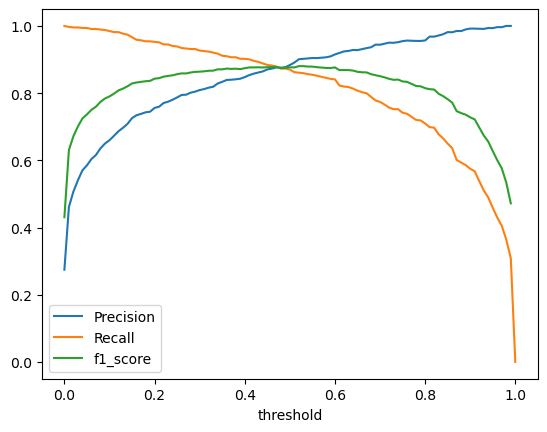

In [52]:
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.plot(df_scores.threshold, df_scores['f1_score'], label='f1_score')
plt.xlabel('threshold')
plt.legend()

In [53]:
#precision and recall curves intersect at threshold=0.48

In [54]:
#0.52 is the threshold at which f1 is maximal

In [55]:
#5)

In [66]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [67]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [68]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values
    
    del df_train["above_average"]
    del df_val["above_average"]
    
    dv, model = train(df_train, y_train, 1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.981 +- 0.003


In [69]:
#6)

In [70]:
!pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 330.3 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.6 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 434.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 78.3/78.3 kB 1.4 MB/s eta 0:00:00


In [71]:
from tqdm.auto import tqdm

In [73]:
for C in tqdm([0.01, 0.1, 0.5,1, 10]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values
        
        del df_train["above_average"]
        del df_val["above_average"]

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/5 [00:00<?, ?it/s]

C=0.01 0.952 +- 0.002
C=0.1 0.972 +- 0.002
C=0.5 0.979 +- 0.004
C=1 0.981 +- 0.003
C=10 0.984 +- 0.003


In [ ]:
# so c=10 leads to the best mean score